In [2]:

import numpy as np
import pyddm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\brian\AppData\Local\Temp\ipykernel_15656\2465091221.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


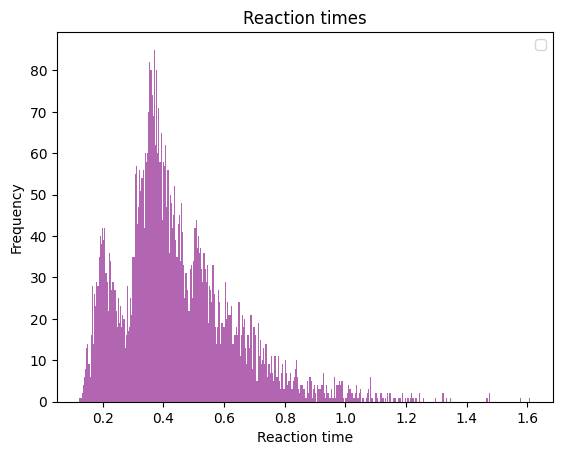

In [3]:
import pyddm.plot

dataset = pd.read_csv("dataset-10.csv")
dataset['correct'] = (dataset['S'] == dataset['R']).astype(int)
dataset.to_csv("dataset2-10.csv", index=False)

df = pd.read_csv("dataset2-10.csv")


plt.hist(df['rt'], bins = 400, alpha = 0.6, color = 'purple')

plt.xlabel('Reaction time')
plt.ylabel('Frequency')
plt.title('Reaction times')
plt.legend()
plt.show()

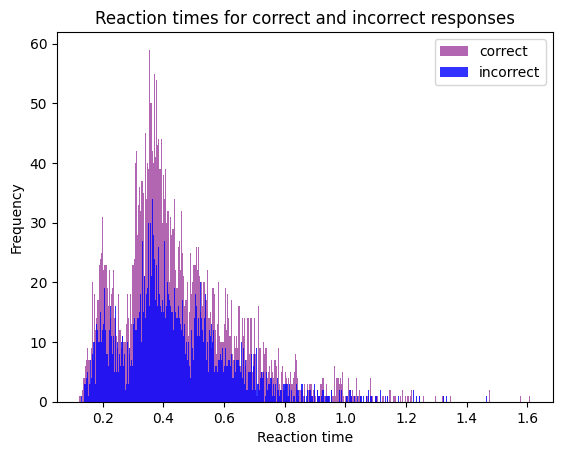

In [4]:
#visualizing whole data
import pyddm.plot

dataset = pd.read_csv("dataset-10.csv")
dataset['correct'] = (dataset['S'] == dataset['R']).astype(int)
dataset.to_csv("dataset2-10.csv", index=False)

df = pd.read_csv("dataset2-10.csv")


plt.hist(df.loc[df['correct'] == 1, 'rt'], bins = 400, alpha = 0.6, color = 'purple', label='correct')
plt.hist(df.loc[df['correct'] == 0, 'rt'], bins = 400, alpha = 0.8, color = 'blue',label='incorrect')

plt.xlabel('Reaction time')
plt.ylabel('Frequency')
plt.title('Reaction times for correct and incorrect responses')
plt.legend()
plt.show()


In [5]:
#inspecting the min and max values, as well as the 25th and 75th percentiles
df.describe()['rt']


count    5520.000000
mean        0.446452
std         0.191449
min         0.123461
25%         0.325758
50%         0.406012
75%         0.541119
max         1.609944
Name: rt, dtype: float64

In [6]:
#finding outliers using visualization and IQR
import plotly.express as px

fig = px.box(df['rt'])
fig.show()
q3 = df['rt'].quantile(0.75)
q1 = df['rt'].quantile(0.25)
IQR=q3 - q1
print('upper lim', q3)
print('lower lim', q1)

upper lim 0.5411188419999999
lower lim 0.32575750324999997


In [7]:
#removing outliers

upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

outlier = df[(df['rt'] > upper) | (df['rt'] < lower)]
df_clean = df.drop(outlier.index)
print('Old shape:', df.shape)
print('New shape:', df_clean.shape)



Old shape: (5520, 6)
New shape: (5324, 6)


In [8]:
#Clean df

df_clean.describe()['rt']


count    5324.000000
mean        0.425306
std         0.157263
min         0.123461
25%         0.322278
50%         0.399606
75%         0.524263
max         0.861549
Name: rt, dtype: float64

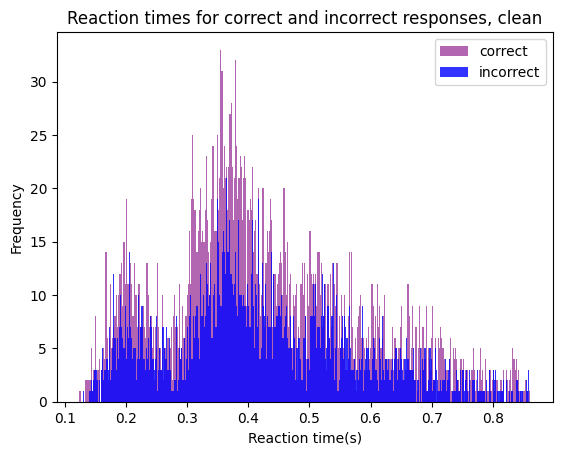

In [9]:
#CLEAN DF HISTO

plt.hist(df_clean.loc[df_clean['correct'] == 1, 'rt'], bins = 400, alpha = 0.6, color = 'purple', label='correct')
plt.hist(df_clean.loc[df_clean['correct'] == 0, 'rt'], bins = 400, alpha = 0.8, color = 'blue',label='incorrect')

plt.xlabel('Reaction time(s)')
plt.ylabel('Frequency')
plt.title('Reaction times for correct and incorrect responses, clean')
plt.legend()
plt.show()


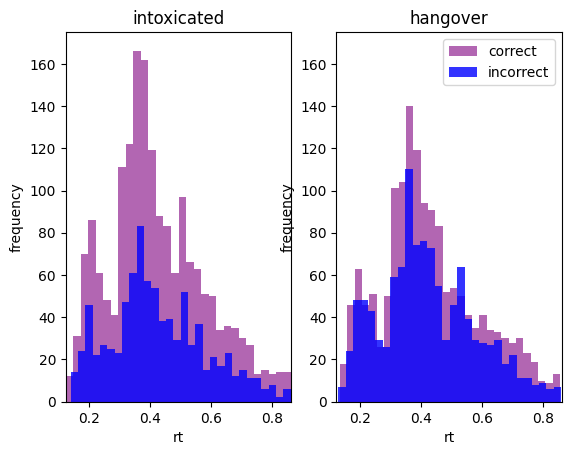

In [10]:
#visualizing data per condition

rts = df_clean['rt']
x_min, x_max = rts.min(), rts.max()

fig, (ax1,ax2) = plt.subplots(1,2)

condition_filt = df_clean[df_clean['condition']=='intoxicated']
ax1.hist(condition_filt.loc[condition_filt['correct'] == 1, 'rt'], bins = 30, alpha = 0.6, color = 'purple', label='correct')
ax1.hist(condition_filt.loc[condition_filt['correct'] == 0, 'rt'], bins = 30, alpha = 0.8, color = 'blue',label='incorrect')
ax1.set_xlim(x_min,x_max)
ax1.set_title('intoxicated')
ax1.set_xlabel('rt')
ax1.set_ylabel('frequency')
ax1.set_ylim(0, 175)

condition_filt = df_clean[df_clean['condition']=='hangover']
ax2.hist(condition_filt.loc[condition_filt['correct'] == 1, 'rt'], bins = 30, alpha = 0.6, color = 'purple', label='correct')
ax2.hist(condition_filt.loc[condition_filt['correct'] == 0, 'rt'], bins = 30, alpha = 0.8, color = 'blue',label='incorrect')
ax2.set_title('hangover')
plt.legend()
ax2.set_xlabel('rt')
ax2.set_ylabel('frequency')
ax2.set_xlim(x_min,x_max)
ax2.set_ylim(0, 175)

plt.show()


In [11]:
#median rt per ID, per condition
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

median_rt = df_clean.groupby(['subjects', 'condition'], sort = False)['rt'].median().reset_index()
median_rt.rename(columns={'rt':'median rt'}, inplace=True)
print(median_rt)
median_rt.to_csv("median_rt.csv")
# plt.bar(median_rt['condition'], median_rt['median rt'])
# plt.tight_layout()
# plt.show()

    subjects    condition  median rt
0          1     hangover   0.259185
1          1  intoxicated   0.267086
2          2  intoxicated   0.432433
3          2     hangover   0.448870
4          3     hangover   0.567029
5          3  intoxicated   0.557406
6          4  intoxicated   0.713094
7          4     hangover   0.703067
8          5     hangover   0.227796
9          5  intoxicated   0.232749
10         6     hangover   0.364731
11         6  intoxicated   0.365532
12         7     hangover   0.226520
13         7  intoxicated   0.215410
14         8  intoxicated   0.438051
15         8     hangover   0.434961
16         9     hangover   0.418530
17         9  intoxicated   0.412354
18        10     hangover   0.392786
19        10  intoxicated   0.384426
20        11     hangover   0.393438
21        11  intoxicated   0.386656
22        12     hangover   0.452526
23        12  intoxicated   0.456178


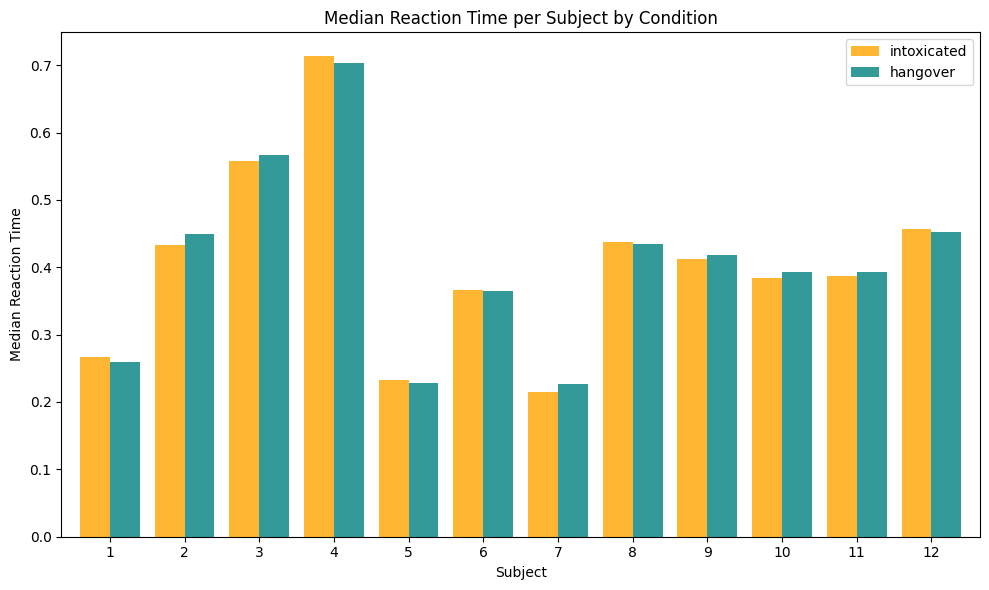

In [12]:
pivot = median_rt.pivot(index='subjects', columns='condition', values='median rt')


pivot = pivot[['intoxicated', 'hangover']] 
pivot.plot(kind='bar', figsize=(10, 6), width=0.8, color=['orange', 'teal'], alpha=0.8)
plt.title('Median Reaction Time per Subject by Condition')
plt.xlabel('Subject')
plt.ylabel('Median Reaction Time')
plt.xticks(rotation=0) 
plt.legend()
plt.tight_layout()

plt.show()

In [13]:
#median rt per condition
median_rt_cond = df_clean.groupby(['condition'], sort = False)['rt'].median().reset_index()
median_rt_cond.rename(columns={'rt':'median rt'}, inplace=True)
median_rt_cond.head()


,condition,median rt
0,hangover,0.403048
1,intoxicated,0.395486


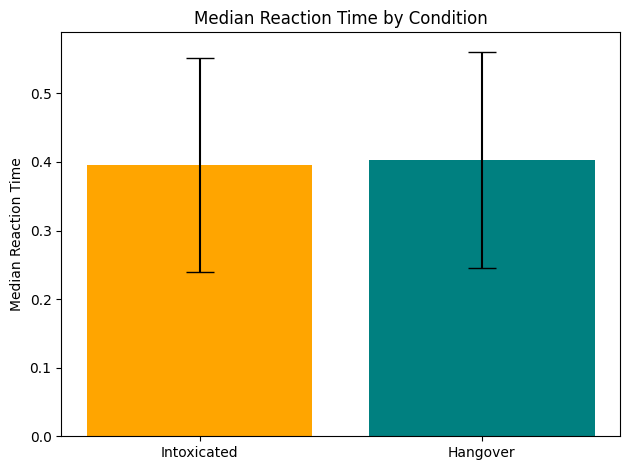

In [14]:

heights = [median_rt_cond.loc[median_rt_cond['condition'] == 'intoxicated', 'median rt' ], median_rt_cond.loc[median_rt_cond['condition'] == 'hangover', 'median rt' ]]
stds = [np.std(df_clean.loc[df_clean['condition'] == 'intoxicated', 'rt' ]), np.std(df_clean.loc[df_clean['condition'] == 'hangover', 'rt' ])]
x = [0,1]
plt.bar(x[0], heights[0], yerr = stds[0],capsize = 10, label='intoxicated', color = 'orange')
plt.bar(x[1], heights[1], yerr = stds[1],capsize = 10, label='hangover', color = 'teal')
plt.xticks(x, ['Intoxicated', 'Hangover'])
plt.ylabel('Median Reaction Time')
plt.title('Median Reaction Time by Condition')
plt.tight_layout()
plt.show()

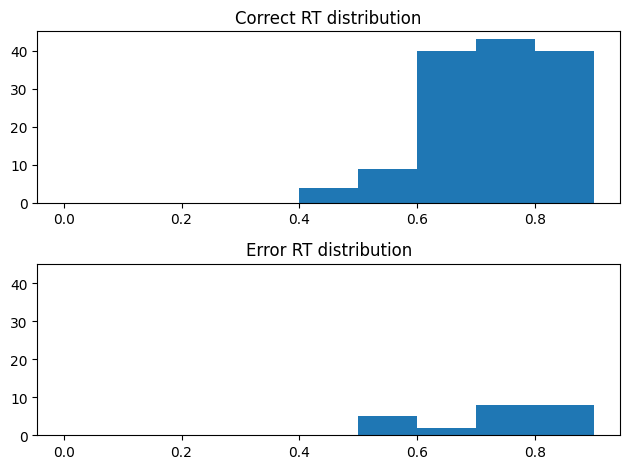

In [15]:
#Pyddm
T_dur = 1
m = pyddm.Model(drift = pyddm.DriftConstant(drift=.5), noise=pyddm.NoiseConstant(noise=.8), bound=pyddm.BoundConstant(B=1.2), overlay=pyddm.OverlayNonDecision(nondectime=.3), T_dur=1)
sol = m.solve()
sample = sol.resample(1000)
correct_rts = sample.corr
error_rts = sample.err
ax1 = plt.subplot(2,1,1)
plt.hist(correct_rts, bins=np.arange(0, T_dur, 20*.005))
plt.title("Correct RT distribution")
plt.subplot(2,1,2, sharey=ax1)
plt.hist(error_rts, bins=np.arange(0,T_dur, 20*.005))
plt.title("Error RT distribution")
plt.tight_layout()

In [16]:
#csv of all hangovers
df_hangover = pd.DataFrame()

for i in range(12):
    df_x_h = df_clean[(df_clean['subjects'] == i+1) & (df_clean['condition'] == "hangover")]
    df_hangover= pd.concat([df_hangover, df_x_h], ignore_index=True)

df_hangover.head()
# df_hangover.to_csv('df_hangover.csv', index=False)

,subjects,S,condition,R,rt,correct
0,1,left,hangover,right,0.345128,0
1,1,left,hangover,left,0.194497,1
2,1,left,hangover,right,0.190204,0
3,1,right,hangover,right,0.205470,1
4,1,right,hangover,right,0.282439,1


In [17]:
#csv of all intoxications
df_intoxicated = pd.DataFrame()

for i in range(12):
    df_x_i = df_clean[(df_clean['subjects'] == i+1) & (df_clean['condition'] == "intoxicated")]
    df_intoxicated = pd.concat([df_intoxicated, df_x_i], ignore_index=True)

df_intoxicated.head()  
# df_intoxicated.to_csv('df_hangover.csv', index=False)

,subjects,S,condition,R,rt,correct
0,1,right,intoxicated,right,0.250334,1
1,1,left,intoxicated,left,0.476767,1
2,1,left,intoxicated,left,0.283910,1
3,1,left,intoxicated,left,0.347984,1
4,1,left,intoxicated,left,0.194548,1


In [18]:
#fitting on single subject

ID = 12

# sample = pyddm.Sample.from_pandas_dataframe(df_intoxicated[(df_intoxicated['subjects'] == ID)], rt_column_name="rt", correct_column_name="correct")
sample = pyddm.Sample.from_pandas_dataframe(df_hangover[(df_hangover['subjects'] == ID)], rt_column_name="rt", correct_column_name="correct")



In [19]:
#model 

class ICPointSideBias(pyddm.InitialCondition):
    name = "A starting point with a left or right bias."
    required_parameters = ["x0"]
    required_conditions = ["R"]
    def get_IC(self, x, dx, conditions):
        start = np.round(self.x0/dx)
        # Positive bias for choices to side 1, negative for side 2
        if conditions['R'] == 2:
            start = -start
        shift_i = int(start + (len(x)-1)/2)
        assert shift_i >= 0 and shift_i < len(x), "Invalid initial conditions"
        pdf = np.zeros(len(x))
        pdf[shift_i] = 1. # Initial condition at x=self.x0.
        return pdf

m = pyddm.Model(drift=pyddm.DriftConstant(drift=pyddm.Fittable(minval=-5, maxval=5)), 
          noise=pyddm.NoiseConstant(noise=pyddm.Fittable(minval=.1, maxval=3)),
          IC=ICPointSideBias(x0=pyddm.Fittable(minval=-.8, maxval=.8)),
          overlay=pyddm.OverlayNonDecision(nondectime=pyddm.Fittable(minval=0, maxval=.5)),
          bound=pyddm.BoundCollapsingExponential(B=1, tau=pyddm.Fittable(minval=.01, maxval=3)))

pyddm.plot.model_gui_jupyter(model=m, sample=sample)

Output()

In [20]:
pyddm.fit_adjust_model(model=m, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
pyddm.display_model(m)


Info: Params [ 1.83718344  2.40725472  0.74192925 -0.01734206  0.33595141] gave -98.18072567741757


Model information:
Choices: 'correct' (upper boundary), 'error' (lower boundary)
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 1.837183
Noise component NoiseConstant:
    constant
    Fitted parameters:
    - noise: 2.407255
Bound component BoundCollapsingExponential:
    collapsing_exponential
    Fixed parameters:
    - B: 1.000000
    Fitted parameters:
    - tau: 0.741929
IC component ICPointSideBias:
    A starting point with a left or right bias.
    Fitted parameters:
    - x0: -0.017342
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fitted parameters:
    - nondectime: 0.335951
Fit information:
    Loss function: Negative log likelihood
    Loss function value: -98.18072567741757
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - nparams: 5
        - samplesize: 224
        - mess: ''



In [21]:
pyddm.plot.model_gui_jupyter(model=m, sample=sample)
import pandas as pd
parameterss = m.parameters()
parameterss = pd.DataFrame(parameterss)

parameterss = parameterss.T

parameterss.reset_index(drop=True, inplace=True)
parameterss.to_csv(f"paramsh{ID}.csv")

parameterss.head()


Output()

,drift,noise,B,tau,x0,nondectime
0,1.837183,NaN,NaN,NaN,NaN,NaN
1,NaN,2.407255,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,0.741929,NaN,NaN
3,NaN,NaN,NaN,NaN,-0.017342,NaN
4,NaN,NaN,NaN,NaN,NaN,0.335951


In [22]:
#copied the individual parameters into one CSV due to not being able to flatten the dataframe from .parameters(), as seen above

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  


params_i = pd.read_csv('params_id_i.csv')
print(params_i)


    subject  drift  noise  bound     IC  overlay
0         1   5.00   2.87      1 -0.030    0.170
1         2   2.24   2.80      1 -0.030    0.330
2         3   4.45   3.00      1 -0.003    0.480
3         4   3.15   1.83      1 -0.240    0.490
4         5   2.88   3.00      1  0.008    0.150
5         6   3.31   3.00      1 -0.006    0.280
6         7   1.70   2.80      1  0.060    0.100
7         8   2.19   2.71      1  0.020    0.320
8         9   1.99   2.51      1  0.040    0.299
9        10   2.97   2.87      1  0.070    0.290
10       11   2.10   2.50      1  0.100    0.280
11       12   2.80   2.40      1 -0.110    0.330


In [23]:
params_h = pd.read_csv('params_id_h.csv')
print(params_h)

    subject  drift  noise  bound     IC  overlay
0         1  -0.79   2.83      1  0.080     0.16
1         2   0.28   2.70      1 -0.030     0.33
2         3  -0.79   2.99      1  0.220     0.48
3         4   1.61   1.94      1 -0.100     0.49
4         5   0.66   3.00      1  0.030     0.15
5         6   1.58   3.00      1  0.100     0.20
6         7   1.38   2.73      1  0.001     0.12
7         8   2.35   2.67      1 -0.006     0.32
8         9   1.82   2.45      1  0.070     0.29
9        10   0.16   2.81      1  0.030     0.29
10       11   0.79   2.62      1  0.029     0.28
11       12   1.81   2.68      1  0.010     0.34


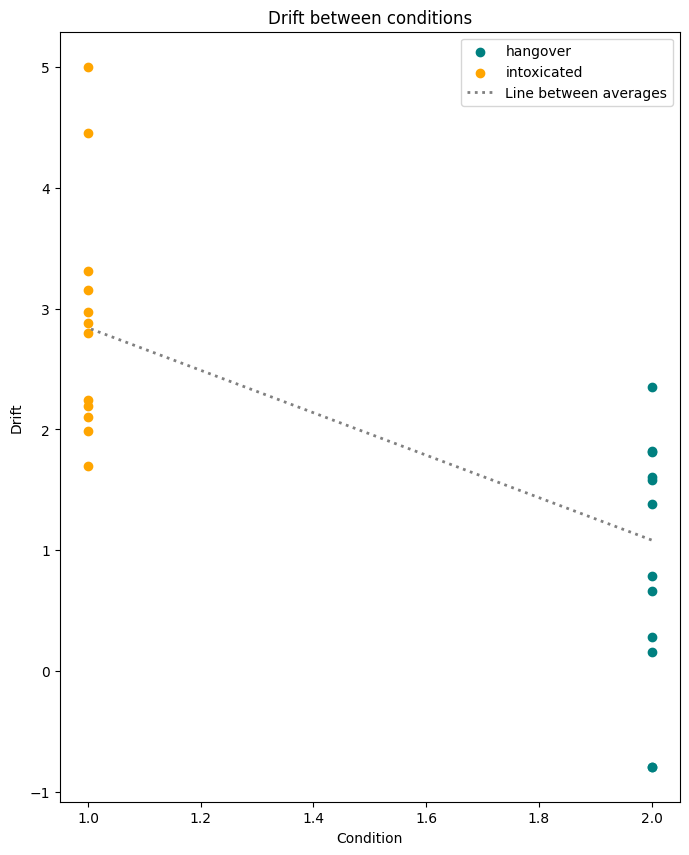

In [24]:
plt.figure(figsize = (8,10))
cond1 = pd.DataFrame([1,1,1,1,1,1,1,1,1,1,1,1])
cond2 = pd.DataFrame([2,2,2,2,2,2,2,2,2,2,2,2])

plt.scatter(cond2, params_h['drift'], label='hangover', color='teal')
plt.scatter(cond1, params_i['drift'], label='intoxicated', color='orange')


coord_x = [2, 1] 
coord_y = [np.median(params_h['drift']), np.median(params_i['drift'])] 


plt.plot(coord_x, coord_y, color='gray', linestyle='dotted', linewidth=2, label='Line between averages')
plt.xlabel("Condition")
plt.ylabel("Drift")
plt.legend()
plt.title("Drift between conditions")


plt.show()

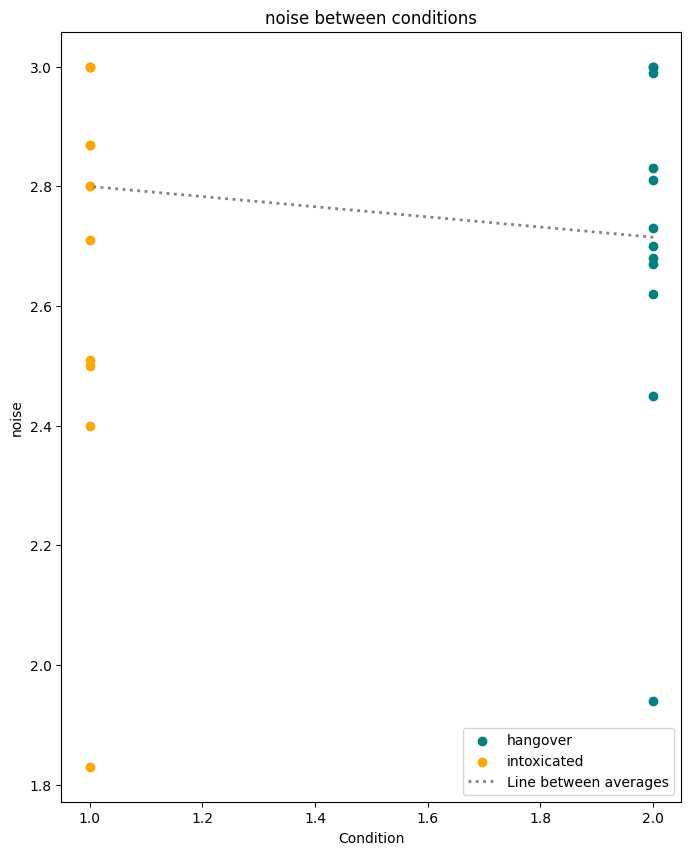

In [25]:
plt.figure(figsize = (8,10))
cond1 = pd.DataFrame([1,1,1,1,1,1,1,1,1,1,1,1])
cond2 = pd.DataFrame([2,2,2,2,2,2,2,2,2,2,2,2])

plt.scatter(cond2, params_h['noise'], label='hangover', color='teal')
plt.scatter(cond1, params_i['noise'], label='intoxicated', color='orange')


coord_x = [2, 1] 
coord_y = [np.median(params_h['noise']), np.median(params_i['noise'])]

plt.plot(coord_x, coord_y, color='gray', linestyle='dotted', linewidth=2, label='Line between averages')
plt.xlabel("Condition")
plt.ylabel("noise")
plt.legend()
plt.title("noise between conditions")


plt.show()

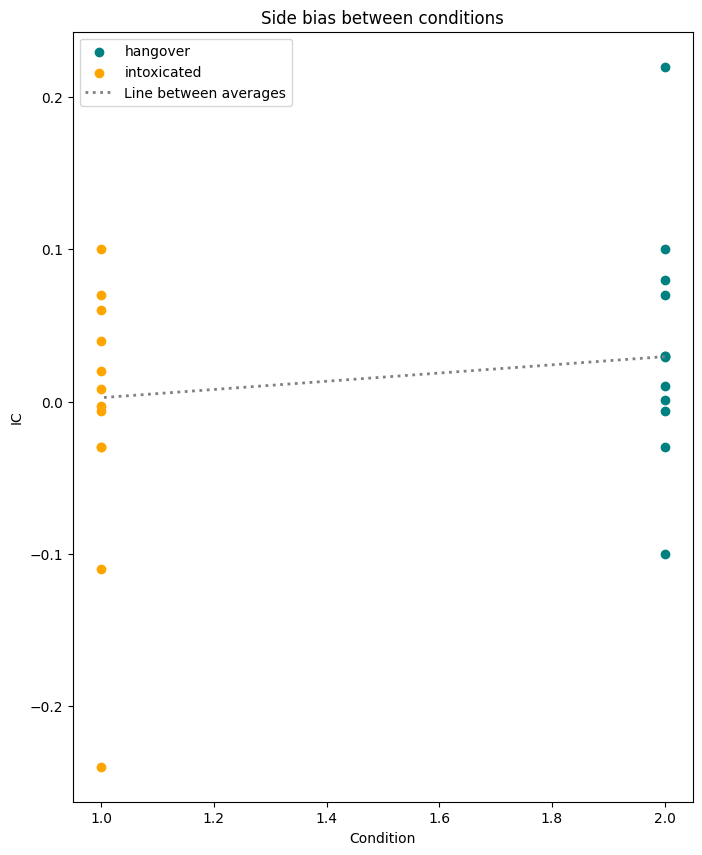

In [26]:
plt.figure(figsize = (8,10))
cond1 = pd.DataFrame([1,1,1,1,1,1,1,1,1,1,1,1])
cond2 = pd.DataFrame([2,2,2,2,2,2,2,2,2,2,2,2])

plt.scatter(cond2, params_h['IC'], label='hangover', color='teal')
plt.scatter(cond1, params_i['IC'], label='intoxicated', color='orange')


coord_x = [2, 1] 
coord_y = [np.median(params_h['IC']), np.median(params_i['IC'])]

plt.plot(coord_x, coord_y, color='gray', linestyle='dotted', linewidth=2, label='Line between averages')
plt.xlabel("Condition")
plt.ylabel("IC")
plt.legend()
plt.title("Side bias between conditions")


plt.show()

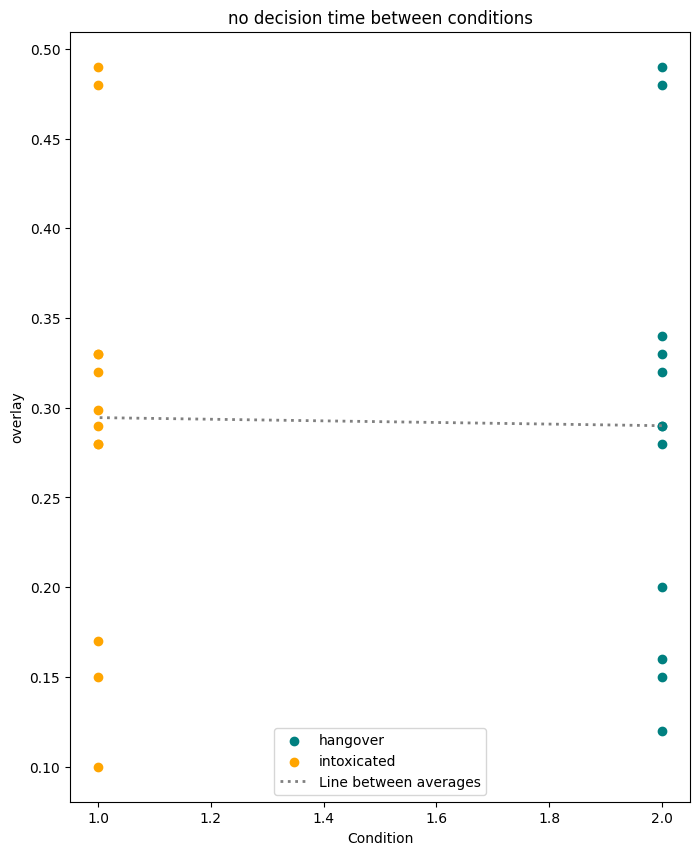

In [27]:
plt.figure(figsize = (8,10))
cond1 = pd.DataFrame([1,1,1,1,1,1,1,1,1,1,1,1])
cond2 = pd.DataFrame([2,2,2,2,2,2,2,2,2,2,2,2])

plt.scatter(cond2, params_h['overlay'], label='hangover', color='teal')
plt.scatter(cond1, params_i['overlay'], label='intoxicated', color='orange')


coord_x = [2, 1] 
coord_y = [np.median(params_h['overlay']), np.median(params_i['overlay'])]

plt.plot(coord_x, coord_y, color='gray', linestyle='dotted', linewidth=2, label='Line between averages')
plt.xlabel("Condition")
plt.ylabel("overlay")
plt.legend()
plt.title("no decision time between conditions")


plt.show()

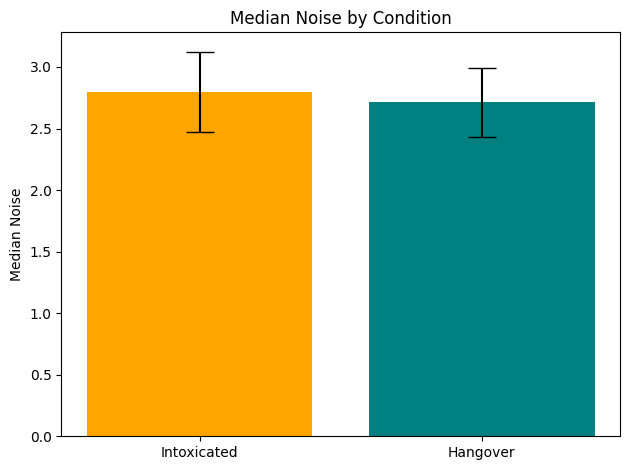

In [28]:
x = [0, 1]


heights = [np.median(params_i['noise']), np.median(params_h['noise'])]
stds = [np.std(params_i['noise']), np.std(params_h['noise'])]

plt.bar(x[0], heights[0], yerr = stds[0],capsize = 10, label='intoxicated', color = 'orange')
plt.bar(x[1], heights[1], yerr = stds[1],capsize = 10, label='hangover', color = 'teal')
plt.xticks(x, ['Intoxicated', 'Hangover'])
plt.ylabel('Median Noise')
plt.title('Median Noise by Condition')
plt.tight_layout()
plt.show()

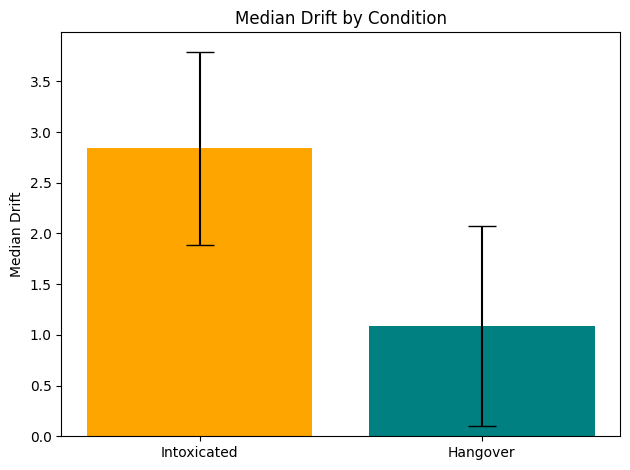

In [29]:
x = [0, 1]


heights = [np.median(params_i['drift']), np.median(params_h['drift'])]
stds = [np.std(params_i['drift']), np.std(params_h['drift'])]

plt.bar(x[0], heights[0], yerr = stds[0],capsize = 10, label='intoxicated', color = 'orange')
plt.bar(x[1], heights[1], yerr = stds[1],capsize = 10, label='hangover', color = 'teal')
plt.xticks(x, ['Intoxicated', 'Hangover'])
plt.ylabel('Median Drift')
plt.title('Median Drift by Condition')
plt.tight_layout()
plt.show()

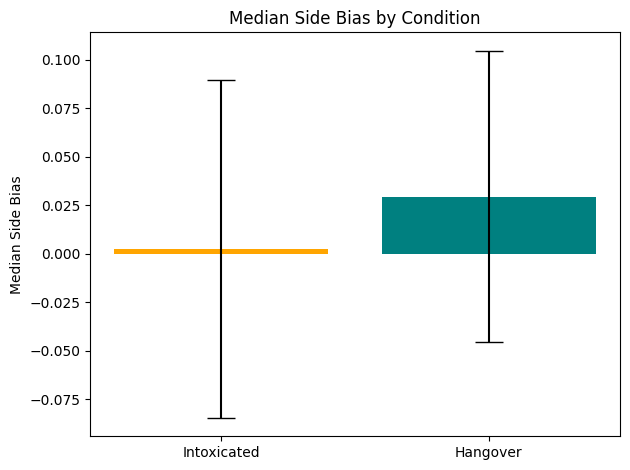

In [30]:
x = [0, 1]


heights = [np.median(params_i['IC']), np.median(params_h['IC'])]
stds = [np.std(params_i['IC']), np.std(params_h['IC'])]

plt.bar(x[0], heights[0], yerr = stds[0],capsize = 10, label='intoxicated', color = 'orange')
plt.bar(x[1], heights[1], yerr = stds[1],capsize = 10, label='hangover', color = 'teal')
plt.xticks(x, ['Intoxicated', 'Hangover'])
plt.ylabel('Median Side Bias')
plt.title('Median Side Bias by Condition')
plt.tight_layout()
plt.show()

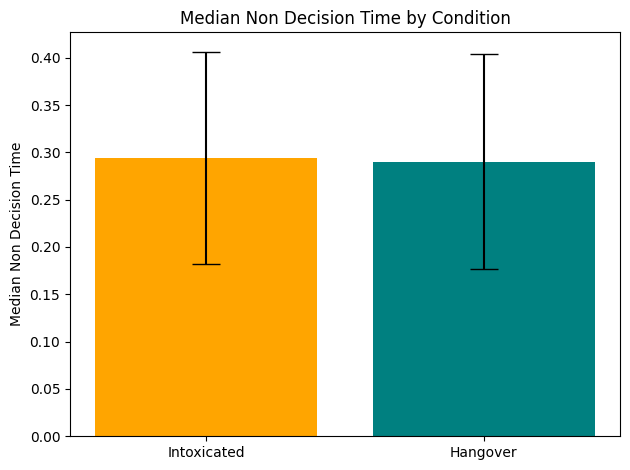

In [31]:
x = [0, 1]


heights = [np.median(params_i['overlay']), np.median(params_h['overlay'])]
stds = [np.std(params_i['overlay']), np.std(params_h['overlay'])]

plt.bar(x[0], heights[0], yerr = stds[0],capsize = 10, label='intoxicated', color = 'orange')
plt.bar(x[1], heights[1], yerr = stds[1],capsize = 10, label='hangover', color = 'teal')
plt.xticks(x, ['Intoxicated', 'Hangover'])
plt.ylabel('Median Non Decision Time')
plt.title('Median Non Decision Time by Condition')
plt.tight_layout()
plt.show()